# Monte Carlo Modelling: Monthly Revenue Predictions

In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## The Data

This is a fabricated data set providing a month orders for an example company.  It lists the units ordered, the unit price and any discounts that have been applied.  FRom this, we can calculate the total orderbook price and the expected revenue following the aplication of discounts.  We also have order numbers and a credit band label in the data.

Each month, there is a probability that a customer will default.  This probability is based their Credit Band in the following way:

|Credit Band|Default Probability|
|--------|--------|
|A|1%|
|B|5%|
|C|10%|
|D|50%|

Can we use monte carlo modelling to detmerine a revenue forecast for the month?

In [2]:
# Import order book data
order_book = pd.read_csv('order_book.csv')
order_book.head()

,Customer Number,Units,Product,Unit Price,Discount,Credit Band,Order Book Price,Revenue
0,A-0000001,626,PROD-5,0.95,0.0,A,594.70,594.70
1,A-0000002,1792,PROD-4,1.50,0.0,A,2688.00,2688.00
2,A-0000003,1090,PROD-5,0.95,0.0,B,1035.50,1035.50
3,A-0000004,1463,PROD-3,2.76,0.0,A,4037.88,4037.88
4,A-0000005,1357,PROD-4,1.50,0.0,A,2035.50,2035.50


## Building The Model

In [3]:
# Build dictionary to apply default probabilities
default_prob ={'A':0.01,'B':0.05,'C':0.1, 'D':0.5}

# Column of default probabilities
order_book['Default Prob'] = order_book['Credit Band'].apply(lambda x : default_prob[x])


In [4]:
# Number of games to play
n = 500
number_of_orders = order_book.shape[0]

# Initate memory for experiment results (indexed by order and experiment)
monthly_default_predictions = np.zeros((n))
modelled_units = np.zeros((number_of_orders,n))
modelled_revenue = np.zeros((number_of_orders,n))

# Run n expriments
for k in range(n):

    # Initate storage for experiment results
    exp_monthly_revenue = []
    exp_monthly_units = []
    defaulted_customers = 0

    # For each order
    for i in range(number_of_orders):
        #Determine if customer defaults based on default_prob mapping
        if random.random() <= default_prob[order_book.iloc[i,5]]:
            # If defaulted, append 0s to results
            exp_monthly_revenue.append(0)
            exp_monthly_units.append(0)
            defaulted_customers += 1
        else:
            # If not defaulted, append orderbook values
            exp_monthly_revenue.append(order_book.iloc[i,7])
            exp_monthly_units.append(order_book.iloc[i,1])

    # Add experiment data to memory
    monthly_default_predictions[k] = defaulted_customers
    modelled_revenue[:,k] = exp_monthly_revenue
    modelled_units[:,k] = exp_monthly_units

# Calculate monthly total orders and units per experiment
monthly_revenue_predictions = np.sum(modelled_revenue, axis=0)
monthly_unit_predictions = np.sum(modelled_units,axis=0)


## Results Analysis

In [5]:
# Calculate Interesting Statistics
order_book_revenue = np.sum(order_book['Order Book Price'])
order_book_units = np.sum(order_book['Units'])
rev_forecast = np.mean(monthly_revenue_predictions)
rev_std = np.std(monthly_revenue_predictions)
defaults_forecast = np.mean(monthly_default_predictions)
defaults_std = np.std(monthly_default_predictions)
unit_forecast = np.mean(monthly_unit_predictions)
unit_std = np.std(monthly_unit_predictions)

In [6]:
# Print out commentary to the screen
print('Based on n = {} experiments and the given orderbook:\n'.format(n))
print('1. We predict a monthly revenue forecast of £ {:.2f}k +/- £{:.2f}k'.format(rev_forecast/1000,rev_std/1000))
print('2. This is {:.2f}% of the total monthly orderbook'.format(100*rev_forecast/order_book_revenue))
print('3. We predict total unit sales of {:.0f}k +/- {:.0f}k)'.format(unit_forecast,unit_std))
print('4. This is {:.2f}% of the orderbook units sold'.format(100*unit_forecast/order_book_units))
print('5. We predict %.0f customer defaults +/- %.0f this month' % (defaults_forecast,defaults_std))

Based on n = 500 experiments and the given orderbook:

1. We predict a monthly revenue forecast of £ 1323.35k +/- £11.53k
2. This is 94.48% of the total monthly orderbook
3. We predict total unit sales of 730371k +/- 6217k)
4. This is 95.27% of the orderbook units sold
5. We predict 35 customer defaults +/- 5 this month


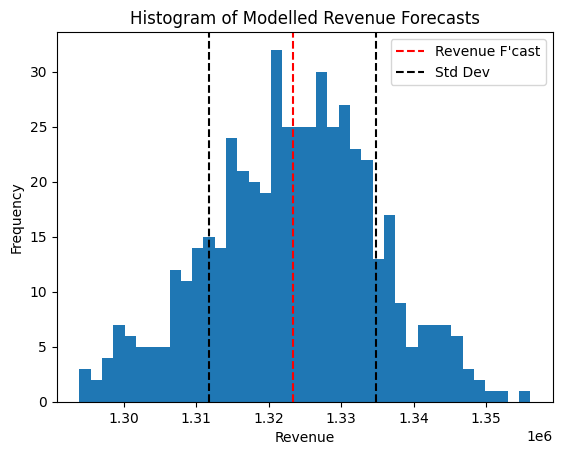

In [7]:
# Plot Modelled Revenue
fig, ax = plt.subplots()
ax.hist(monthly_revenue_predictions,bins = 40)
ax.set_title('Histogram of Modelled Revenue Forecasts')
ax.set_xlabel('Revenue')
ax.set_ylabel('Frequency')
ax.axvline(rev_forecast,color='red',linestyle='--',label ='Revenue F\'cast')
ax.axvline(rev_forecast + rev_std,color = 'black', linestyle ='--', label ='Std Dev')
ax.axvline(rev_forecast - rev_std,color = 'black', linestyle ='--')
plt.legend(loc = 1)
plt.show()

## What If Analysis

What if the probability of default dramatically changed?

|Credit Band|Default Probability|
|--------|--------|
|A|25%|
|B|30%|
|C|75%|
|D|90%|

** *NOTE: The code below re uses variable names from earlier in this note book!!!* **

In [8]:
# Build dictionary to apply default probabilities
default_prob ={'A':0.25,'B':0.30,'C':0.75, 'D':0.9}

# Initate memory for experiment results (indexed by order and experiment)
monthly_default_predictions = np.zeros((n))
modelled_units = np.zeros((number_of_orders,n))
modelled_revenue = np.zeros((number_of_orders,n))

# Run n expriments
for k in range(n):

    # Initate storage for experiment results
    exp_monthly_revenue = []
    exp_monthly_units = []
    defaulted_customers = 0

    # For each order
    for i in range(number_of_orders):
        #Determine if customer defaults based on default_prob mapping
        if random.random() <= default_prob[order_book.iloc[i,5]]:
            # If defaulted, append 0s to results
            exp_monthly_revenue.append(0)
            exp_monthly_units.append(0)
            defaulted_customers += 1
        else:
            # If not defaulted, append orderbook values
            exp_monthly_revenue.append(order_book.iloc[i,7])
            exp_monthly_units.append(order_book.iloc[i,1])

    # Add experiment data to memory
    monthly_default_predictions[k] = defaulted_customers
    modelled_revenue[:,k] = exp_monthly_revenue
    modelled_units[:,k] = exp_monthly_units

# Calculate monthly total orders and units per experiment
monthly_revenue_predictions = np.sum(modelled_revenue, axis=0)
monthly_unit_predictions = np.sum(modelled_units,axis=0)


In [9]:
# Calculate Interesting Statistics
rev_forecast = np.mean(monthly_revenue_predictions)
rev_std = np.std(monthly_revenue_predictions)
defaults_forecast = np.mean(monthly_default_predictions)
defaults_std = np.std(monthly_default_predictions)
unit_forecast = np.mean(monthly_unit_predictions)
unit_std = np.std(monthly_unit_predictions)

In [10]:
# Print out commentary to the screen
print('Based on n = {} experiments and the given orderbook:\n'.format(n))
print('1. We predict a monthly revenue forecast of £ {:.2f}k +/- £{:.2f}k'.format(rev_forecast/1000,rev_std/1000))
print('2. This is {:.2f}% of the total monthly orderbook'.format(100*rev_forecast/order_book_revenue))
print('3. We predict total unit sales of {:.0f}k +/- {:.0f}k)'.format(unit_forecast,unit_std))
print('4. This is {:.2f}% of the orderbook units sold'.format(100*unit_forecast/order_book_units))
print('5. We predict %.0f customer defaults +/- %.0f this month' % (defaults_forecast,defaults_std))

Based on n = 500 experiments and the given orderbook:

1. We predict a monthly revenue forecast of £ 837.42k +/- £25.95k
2. This is 59.78% of the total monthly orderbook
3. We predict total unit sales of 462750k +/- 13531k)
4. This is 60.36% of the orderbook units sold
5. We predict 295 customer defaults +/- 11 this month


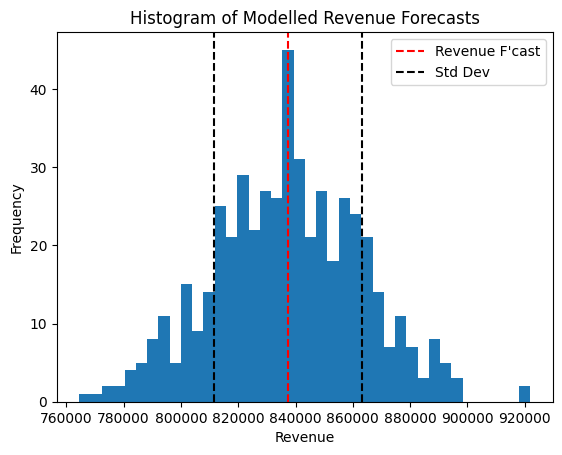

In [11]:
# Plot Modelled Revenue
fig, ax = plt.subplots()
ax.hist(monthly_revenue_predictions,bins = 40)
ax.set_title('Histogram of Modelled Revenue Forecasts')
ax.set_xlabel('Revenue')
ax.set_ylabel('Frequency')
ax.axvline(rev_forecast,color='red',linestyle='--',label ='Revenue F\'cast')
ax.axvline(rev_forecast + rev_std,color = 'black', linestyle ='--', label ='Std Dev')
ax.axvline(rev_forecast - rev_std,color = 'black', linestyle ='--')
plt.legend(loc = 1)
plt.show()